In [1]:
import json
import pandas as pd
import datetime as dt
from imdb import IMDb
from imdb import helpers
ia = IMDb()

In [2]:
s_result = ia.search_movie('aeon')
s_result

[<Movie id:7848542[http] title:_Aeon (2018)_>,
 <Movie id:9298654[http] title:_Aeon (2019)_>,
 <Movie id:1540750[http] title:_Aeon (2007) (V)_>,
 <Movie id:0402022[http] title:_Æon Flux (2005)_>,
 <Movie id:0111873[http] title:_"Æon Flux" (1991)_>,
 <Movie id:8550722[http] title:_"Aeon Flux" (2019)_>,
 <Movie id:2854990[http] title:_The Last Vampyre on Earth (2013)_>,
 <Movie id:0190841[http] title:_Aeon - Countdown im All (2000)_>,
 <Movie id:3748528[http] title:_Rogue One: A Star Wars Story (2016)_>,
 <Movie id:8439140[http] title:_Aeon (2004)_>,
 <Movie id:0795512[http] title:_Æon Flux (2005) (VG)_>,
 <Movie id:0071007[http] title:_"Little House on the Prairie" (1974)_>,
 <Movie id:1974419[http] title:_The Neon Demon (2016)_>,
 <Movie id:3734428[http] title:_Strange Aeons (2014)_>,
 <Movie id:0118571[http] title:_Air Force One (1997)_>,
 <Movie id:7134120[http] title:_Star Wars: Aeon (2016)_>,
 <Movie id:0374900[http] title:_Napoleon Dynamite (2004)_>,
 <Movie id:0087800[http] title

In [3]:
rick_n_morty = '2861424'
ren_n_stimpy = '0371475'
beevis_n_butthead = '0105950'
aeon_flux = '0111873' # in case of re search copy Æon Flux
celeb_deathmatch = '0208614'
daria = '0118298'
south_park = '0121955'
fam_guy = '0182576'
american_dad = '0397306'
king_hill = '0118375'
space_ghost = '0108937'
futurama = '0149460'
aqua_thf = '0297494'
archer = '1486217'
boondocks = '0373732'
metalocalypse = '0839188'
robot_chick = '0437745'
squidbillies = '0457146'
super_jail = '1031283'
big_mouth = '6524350'
bobs_burg = '1561755'
bojack = '3398228'
mr_pickles = '2950342'
venture = '0417373'
simpsons = '0096697'
spawn = '4641774'

curr_titles = ([rick_n_morty,ren_n_stimpy,beevis_n_butthead,aeon_flux,celeb_deathmatch,daria,
                south_park,fam_guy,american_dad,king_hill,space_ghost,futurama,aqua_thf,archer,
                boondocks,metalocalypse,robot_chick,squidbillies,super_jail,big_mouth,bobs_burg,
                bojack,mr_pickles,venture,simpsons,spawn])
curr_titles

['2861424',
 '0371475',
 '0105950',
 '0111873',
 '0208614',
 '0118298',
 '0121955',
 '0182576',
 '0397306',
 '0118375',
 '0108937',
 '0149460',
 '0297494',
 '1486217',
 '0373732',
 '0839188',
 '0437745',
 '0457146',
 '1031283',
 '6524350',
 '1561755',
 '3398228',
 '2950342',
 '0417373',
 '0096697',
 '4641774']

## User Defined Config

In [4]:
# Must be a list of TV series to plot
titles = ['0096697', '0182576', '0121955', '2861424']
rick_n_morty

'2861424'

## Extract the Data

In [5]:
start = dt.datetime.now()
#series = [ia.get_movie(t) for t in curr_titles]
series = [ia.get_movie(rick_n_morty)]
end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

Time elapsed: 0:00:01.481299


In [6]:
series
for s in series:
    ia.update(s, 'episodes')

end = dt.datetime.now()

In [57]:
rnm = series
for i in rnm:
    print(rnm[i])


TypeError: list indices must be integers or slices, not Movie

In [30]:
start = dt.datetime.now()
for s in series:
    ia.update(s, 'episodes')

end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

print(series[0])
#for i in series[0].keys():
#    print(f"{i}: {series[0][i]}")

ratings = []
dates = []
votes = []
plots = []
titles = []

c = 0

for s in series: 
    episodes = helpers.sortedEpisodes(s)
    ratings.append([])
    dates.append([])
    votes.append([])
    plots.append([])
    titles.append([])
    for e in episodes:        
        try:
            ratings[c].append(e['rating'])
        except KeyError:
            print(f'problem reading rating: for {s}, {e}')
            continue
            
        try:
            timestamp = dt.datetime.strptime(e['original air date'] , "%d %b %Y")
            dates[c].append(timestamp)
        except KeyError:
            print(f'problem reading timestamp: for {s}, {e}')
            ratings[c].pop()
            continue
        except ValueError:
            try:
                timestamp = dt.datetime.strptime(e['original air date'] , "%d %b. %Y")
                dates[c].append(timestamp)
            except:
                print(f'problem reading timestamp: for {s}, {e}')
                ratings[c].pop()
                
    c = c + 1
    

Time elapsed: 0:00:00
Rick and Morty
problem reading rating: for Rick and Morty, Episode #4.1


In [32]:
ratings

[[8.0,
  8.5,
  8.3,
  8.5,
  8.7,
  8.8,
  8.0,
  8.5,
  8.3,
  9.0,
  8.3,
  8.5,
  8.6,
  8.3,
  9.3,
  8.1,
  9.0,
  8.3,
  7.5,
  8.3,
  9.0,
  9.5,
  8.1,
  9.2,
  8.1,
  8.4,
  8.8,
  9.8,
  8.7,
  7.9,
  8.1]]

In [65]:
series

[<Movie id:2861424[http] title:_"Rick and Morty" (2013)_>,
 <Movie id:0371475[http] title:_"Ren & Stimpy 'Adult Party Cartoon'" (2003)_>,
 <Movie id:0105950[http] title:_"Beavis and Butt-Head" (1993)_>,
 <Movie id:0111873[http] title:_"Æon Flux" (1991)_>,
 <Movie id:0208614[http] title:_"Celebrity Deathmatch" (1998)_>,
 <Movie id:0118298[http] title:_"Daria" (1997)_>,
 <Movie id:0121955[http] title:_"South Park" (1997)_>,
 <Movie id:0182576[http] title:_"Family Guy" (1998)_>,
 <Movie id:0397306[http] title:_"American Dad!" (2005)_>,
 <Movie id:0118375[http] title:_"King of the Hill" (1997)_>,
 <Movie id:0108937[http] title:_"Space Ghost Coast to Coast" (1993)_>,
 <Movie id:0149460[http] title:_"Futurama" (1999)_>,
 <Movie id:0297494[http] title:_"Aqua Teen Hunger Force" (2000)_>,
 <Movie id:1486217[http] title:_"Archer" (2009)_>,
 <Movie id:0373732[http] title:_"The Boondocks" (2005)_>,
 <Movie id:0839188[http] title:_"Metalocalypse" (2006)_>,
 <Movie id:0437745[http] title:_"Robot Chi

### Inspect...

In [68]:
# The Simpsons S01E02
for k in series[0]['episodes'][1][2].keys():
    print(f"{k}: {series[24]['episodes'][1][2][k]}")

title: Bart the Genius
kind: episode
episode of: The Simpsons (TV Series 1989– )
season: 1
episode: 2
rating: 7.8
votes: 2798
original air date: 14 Jan. 1990
year: 1990
plot: 
    Bart ends up at a school for gifted children after cheating on an IQ test.    
canonical title: Bart the Genius
long imdb title: "The Simpsons (TV Series 1989– )" Bart the Genius (1990)
long imdb canonical title: "Simpsons (TV Series 1989– ), The" Bart the Genius (1990)
smart canonical title: Bart the Genius
smart long imdb canonical title: "Simpsons (TV Series 1989– ), The" Bart the Genius (1990)
long imdb episode title: "The Simpsons (TV Series 1989– )" Bart the Genius (1990)
series title: The Simpsons (TV Series 1989– )
canonical series title: Simpsons (TV Series 1989– ), The
episode title: Bart the Genius
canonical episode title: Bart the Genius
smart canonical series title: Simpsons (TV Series 1989– ), The
smart canonical episode title: Bart the Genius


In [71]:
# Family Guy S04E05
for k in series[0]['episodes'][1][2].keys():
    print(f"{k}: {series[7]['episodes'][4][5][k]}")

title: The Cleveland-Loretta Quagmire
kind: episode
episode of: Family Guy (TV Series 1998– )
season: 4
episode: 5
rating: 7.6
votes: 1102
original air date: 12 Jun. 2005
year: 2005
plot: 
    Cleveland's wife Loretta has an affair with Quagmire.    
canonical title: Cleveland-Loretta Quagmire, The
long imdb title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
long imdb canonical title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
smart canonical title: Cleveland-Loretta Quagmire, The
smart long imdb canonical title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
long imdb episode title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
series title: Family Guy (TV Series 1998– )
canonical series title: Family Guy (TV Series 1998– )
episode title: The Cleveland-Loretta Quagmire
canonical episode title: Cleveland-Loretta Quagmire, The
smart canonical series title: Family Guy (TV Series 1998– )
sm

In [72]:
## TODO: refactor this...

ratings = []
dates = []
votes = []
plots = []
titles = []

c = 0
for s in series: 
    episodes = helpers.sortedEpisodes(s)
    ratings.append([])
    dates.append([])
    votes.append([])
    plots.append([])
    titles.append([])
    for e in episodes:        
        try:
            ratings[c].append(e['rating'])
        except KeyError:
            print(f'problem reading rating: for {s}, {e}')
            continue
            
        try:
            timestamp = dt.datetime.strptime(e['original air date'] , "%d %b %Y")
            dates[c].append(timestamp)
        except KeyError:
            print(f'problem reading timestamp: for {s}, {e}')
            ratings[c].pop()
            continue
        except ValueError:
            try:
                timestamp = dt.datetime.strptime(e['original air date'] , "%d %b. %Y")
                dates[c].append(timestamp)
            except:
                print(f'problem reading timestamp: for {s}, {e}')
                ratings[c].pop()
                
    c = c + 1

problem reading rating: for Rick and Morty, Episode #4.1
problem reading timestamp: for Beavis and Butt-Head, Burger World
problem reading rating: for Celebrity Deathmatch, Yankovic vs. Wayans
problem reading timestamp: for Celebrity Deathmatch, 37th Annual Sci-Fi Fight Night
problem reading timestamp: for Celebrity Deathmatch, The Battle of the Boys with Toys
problem reading timestamp: for Celebrity Deathmatch, Magic, Flashbacks and Pregnancies
problem reading timestamp: for Celebrity Deathmatch, The Time Machine
problem reading timestamp: for Celebrity Deathmatch, The End of the Real World
problem reading timestamp: for Celebrity Deathmatch, 4th July Celebration
problem reading timestamp: for Celebrity Deathmatch, Family Night
problem reading timestamp: for Celebrity Deathmatch, The Laser Pointer
problem reading timestamp: for Celebrity Deathmatch, Robot Nick
problem reading timestamp: for Celebrity Deathmatch, From the Streets of New York
problem reading timestamp: for Celebrity Dea

In [73]:
len(dates[1]), len(ratings[1])

(8, 8)

## Plots

In [74]:
import matplotlib.pyplot as plt

C:\Users\misir\Anaconda3\envs\pythondata\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


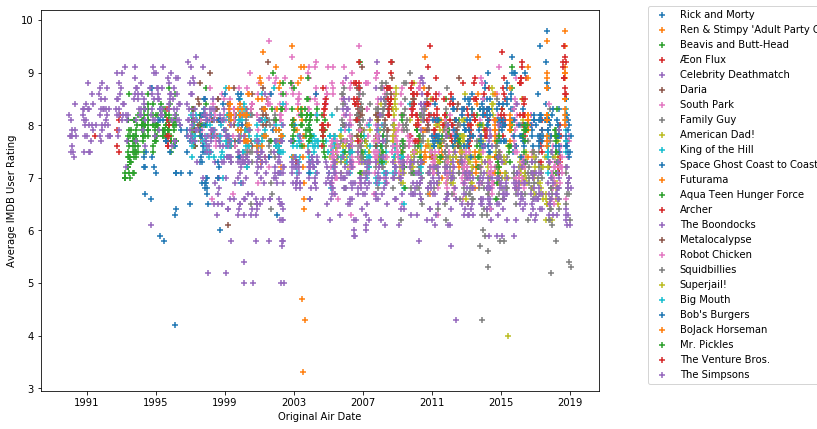

In [81]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

for i in range(len(series)):
    ax.scatter(dates[i], ratings[i], label=series[i]['title'], marker='+')
    
ax.set_xlabel('Original Air Date')
ax.set_ylabel('Average IMDB User Rating')

fig.legend(bbox_to_anchor=(1.20, .85))
fig.show()
plt.savefig("testgraph.png")